# HR Attrition

Research Objectives:

1. Identify possible factors contributing to employees leaving an organization. 
2. Predict or prevent turnover.
3. Quantify costs of losing employees.
4. Nurture the culture of retention within the organization.

In [1]:
# !pip install kmodes

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
sns.set_theme(style='white', palette='deep')


import warnings
warnings.filterwarnings("ignore")

from kmodes.kmodes import KModes

In [155]:
attrition_data = pd.read_csv("IBM_HR-Attrition.csv")
attrition_data.head(2)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   

              JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0     Sales Executive                4        Single           5993   
1  Research Scientist                2       Married           5130   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

# Drop unnecessary columns

In [156]:
attrition_data.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours", "StockOptionLevel"], inplace=True)

In [5]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [6]:
attrition_data.describe().T

count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.0   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.0   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.0   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.0   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.0   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.0   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [7]:
attrition_data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [8]:
attrition_data.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [9]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# numeric and categorical columns
num_col = attrition_data.describe().columns.tolist()
cat_col = attrition_data.describe(include="object").columns.tolist()

# num_col
# cat_col

In [11]:
corr = attrition_data[num_col].corr()
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007707  ...   
DistanceFromHome          0.005303        -0.003669      -0.017014  ...   
Education                 0.101589        -0.011296       0.094961  ... 

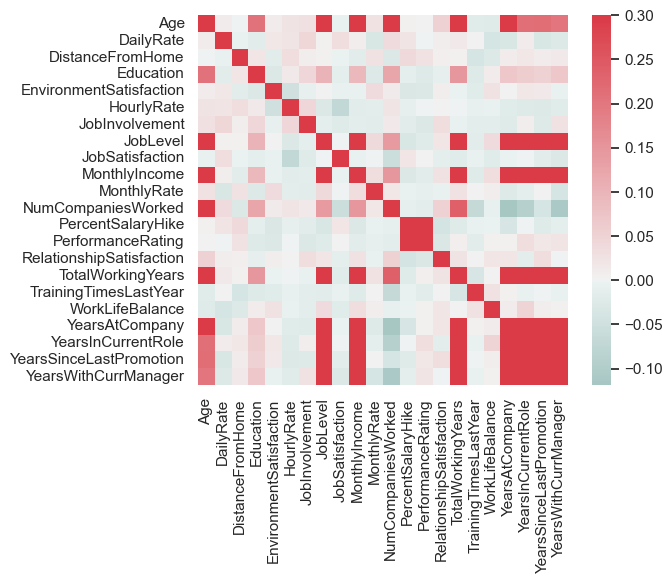

In [12]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True)
plt.show()

In [13]:
Attrition_Yes = attrition_data[attrition_data["Attrition"] == "Yes"]
Attrition_No = attrition_data[attrition_data["Attrition"] == "No"]
Attrition_Mean = pd.concat((Attrition_Yes.mean(numeric_only=True), Attrition_No.mean(numeric_only=True)), axis=1)
Attrition_Mean.columns = ["Yes","No"]
Attrition_Mean.round(2).style.background_gradient(cmap="Pastel1",axis=1)

In [14]:
Attrition_Yes["Attrition"].value_counts() 
# = 237

Yes    237
Name: Attrition, dtype: int64

In [15]:
Attrition_No["Attrition"].value_counts()
# = 1233

No    1233
Name: Attrition, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [143]:
colors = ['#eff3ff','#bdd7e7','#6baed6','#2171b5']
attrition_palette = {"Yes": "#0570b0", "No": '#bdc9e1'}
seq_palette = sns.light_palette(colors[-1], n_colors=len(colors), reverse=True, input='hex')
seq_palette.reverse()

font = {'size': 10}

# Attrition Count

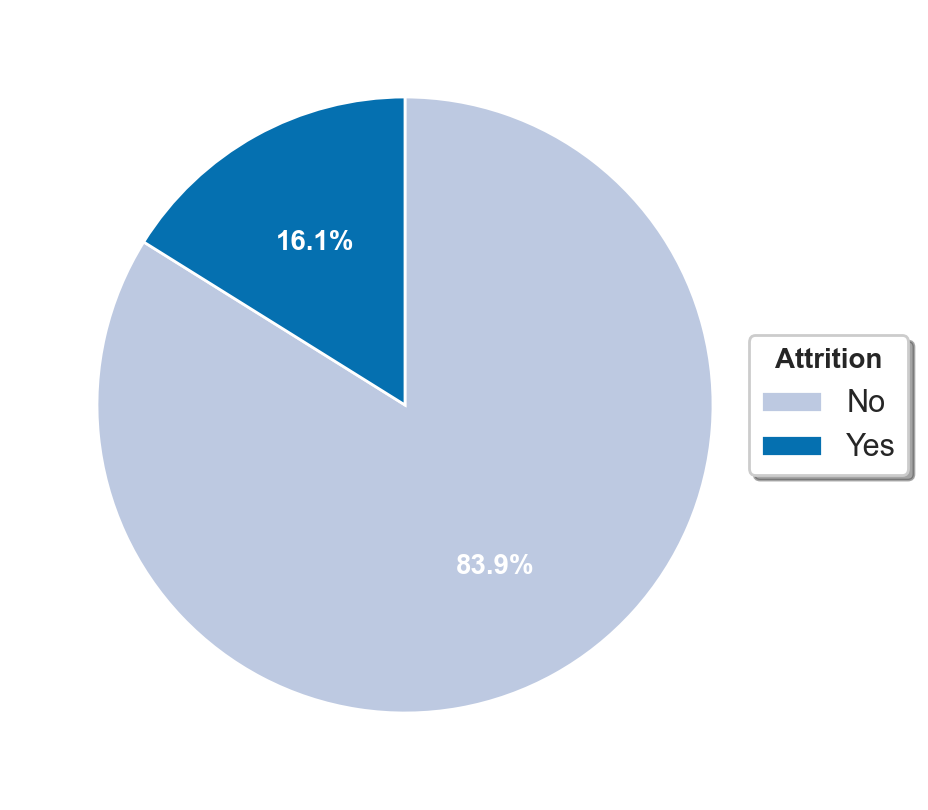

In [131]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)

colors = [attrition_palette[val] for val in ['No', 'Yes']]
wedges, _, labels = ax.pie(x=attrition_data['Attrition'].value_counts(), colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'fontsize': 10, 'color': 'white', 'fontweight': 'bold'})
plt.setp(labels, fontsize=10, fontweight='bold')

ax.legend(wedges, ['No', 'Yes'], title='Attrition', loc='center', bbox_to_anchor=(1.05, 0.5), fancybox=True, shadow=True, ncol=1)
plt.setp(ax.get_legend().get_title(), fontsize=10, fontweight='bold')

plt.show()

# Correlation

Determine numeric and categorical values.

In [18]:
# numeric and categorical columns
num_col = attrition_data.describe().columns.tolist()
cat_col = attrition_data.describe(include="object").columns.tolist()

# num_col
# cat_col

In [19]:
corr = attrition_data[num_col].corr()
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007707  ...   
DistanceFromHome          0.005303        -0.003669      -0.017014  ...   
Education                 0.101589        -0.011296       0.094961  ... 

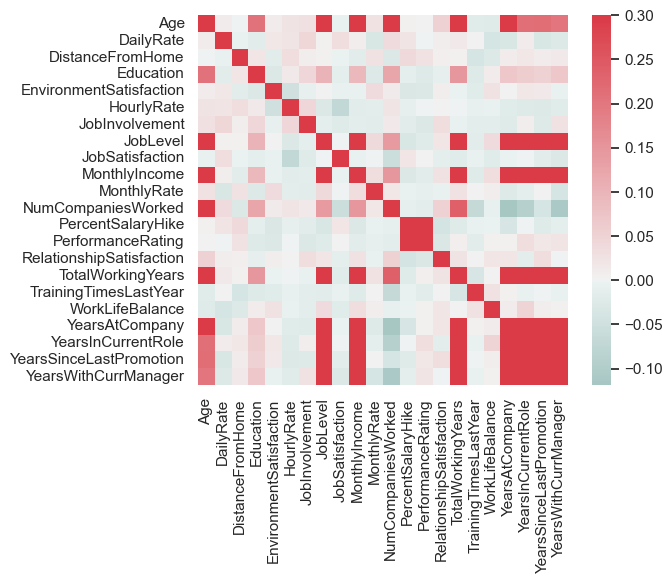

In [20]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True)
plt.show()

# Age

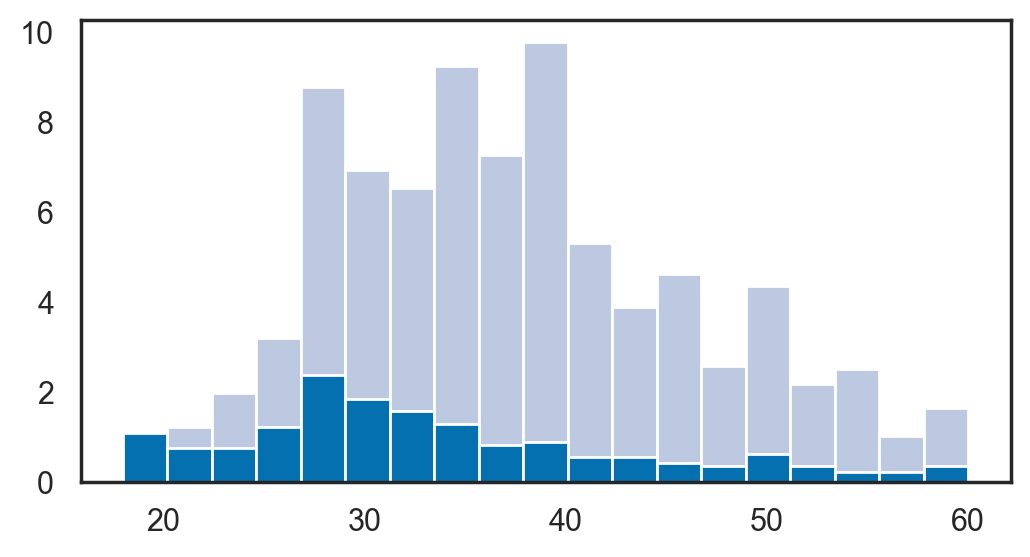

In [21]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, x="Age", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None)
plt.show()

# Gender

In [22]:
attrition_gender_data = attrition_data["Attrition"].groupby(attrition_data["Gender"]).value_counts(normalize=True)*100
attrition_gender_data

Gender  Attrition
Female  No           85.204082
        Yes          14.795918
Male    No           82.993197
        Yes          17.006803
Name: Attrition, dtype: float64

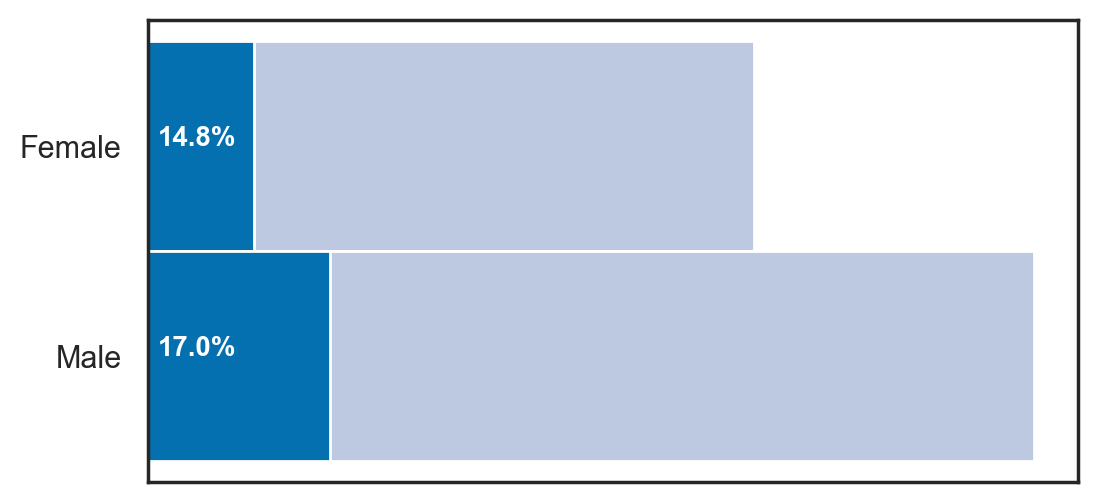

In [132]:
attrition_gender_data = attrition_data.groupby(['Gender', 'Attrition']).size().reset_index(name='Counts')
attrition_gender_data['Percentages'] = (attrition_gender_data['Counts'] / attrition_gender_data.groupby('Gender')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, y="Gender", hue="Attrition", palette=attrition_palette, alpha=1, legend=False).set(xlabel=None, ylabel=None, xticklabels=[])

for i, v in enumerate(attrition_data['Gender'].unique()):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_gender_data[(attrition_gender_data['Gender']==v) & (attrition_gender_data['Attrition']==attrition_value)]['Percentages'].values[0])
        ax.annotate(percentage, xy=(0.01, i+j/2), xycoords=ax.get_yaxis_transform(), fontsize=10, color='white', fontweight='bold')

plt.show()

# Marital Status

In [123]:
attrition_status_data = attrition_data["Attrition"].groupby(attrition_data["MaritalStatus"]).value_counts(normalize=True)*100
attrition_status_data

MaritalStatus  Attrition
Divorced       No           89.908257
               Yes          10.091743
Married        No           87.518574
               Yes          12.481426
Single         No           74.468085
               Yes          25.531915
Name: Attrition, dtype: float64

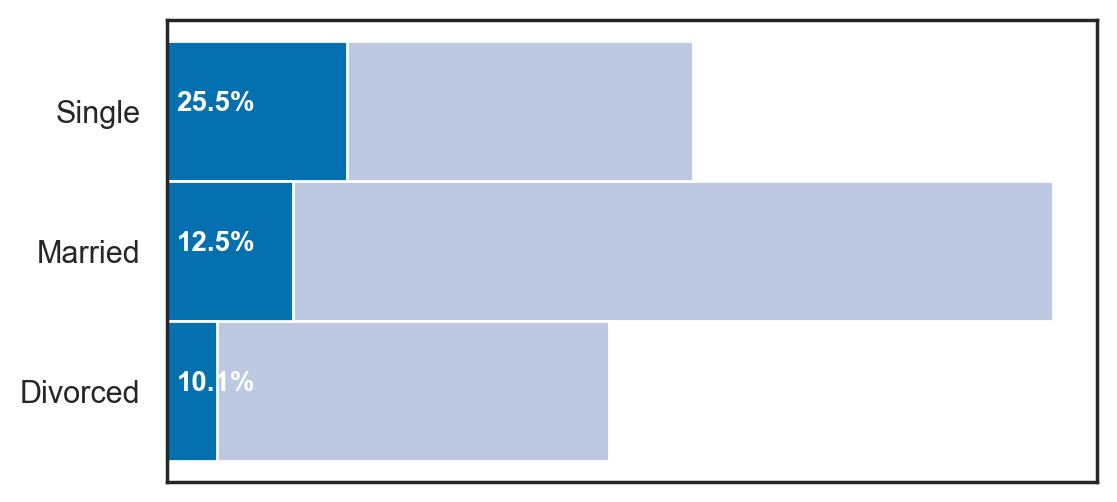

In [298]:
attrition_status_data = attrition_data.groupby(['MaritalStatus', 'Attrition']).size().reset_index(name='Counts')
attrition_status_data['Percentages'] = (attrition_status_data['Counts'] / attrition_status_data.groupby('MaritalStatus')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, y="MaritalStatus", hue="Attrition", palette=attrition_palette, alpha=1, legend=False).set(xlabel=None, ylabel=None, xticklabels=[])

for i, v in enumerate(attrition_data['MaritalStatus'].unique()):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_status_data[(attrition_status_data['MaritalStatus']==v) & (attrition_status_data['Attrition']==attrition_value)]['Percentages'].values[0])
        ax.annotate(percentage, xy=(0.01, i+j/2), xycoords=ax.get_yaxis_transform(), fontsize=10, color='white', fontweight='bold')

plt.show()

# Environment Satisfaction

In [281]:
attrition_environment_data = attrition_data["Attrition"].groupby(attrition_data["EnvironmentSatisfaction"]).value_counts(normalize=True)*100
attrition_environment_data

EnvironmentSatisfaction  Attrition
1                        No           74.647887
                         Yes          25.352113
2                        No           85.017422
                         Yes          14.982578
3                        No           86.313466
                         Yes          13.686534
4                        No           86.547085
                         Yes          13.452915
Name: Attrition, dtype: float64

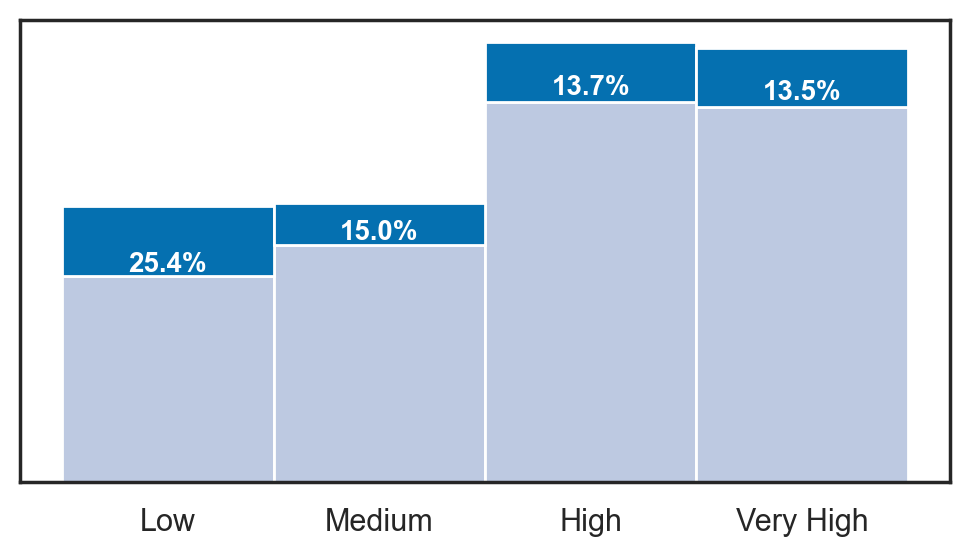

In [289]:
attrition_environment_data = attrition_data.groupby(['EnvironmentSatisfaction', 'Attrition']).size().reset_index(name='Counts')
attrition_environment_data['Percentages'] = (attrition_environment_data['Counts'] / attrition_environment_data.groupby('EnvironmentSatisfaction')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="EnvironmentSatisfaction", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binrange=(0.5, 4.5), binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=[])

env_sat_values = attrition_data['EnvironmentSatisfaction'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_environment_data[(attrition_environment_data['EnvironmentSatisfaction']==v) & (attrition_environment_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')

plt.xticks(ticks=[1, 2, 3, 4], labels=['Low', 'Medium', 'High', 'Very High'])
plt.show()

# Job Involvement

In [292]:
attrition_job_involvement_data = attrition_data["Attrition"].groupby(attrition_data["JobInvolvement"]).value_counts(normalize=True)*100
attrition_job_involvement_data

JobInvolvement  Attrition
1               No           66.265060
                Yes          33.734940
2               No           81.066667
                Yes          18.933333
3               No           85.599078
                Yes          14.400922
4               No           90.972222
                Yes           9.027778
Name: Attrition, dtype: float64

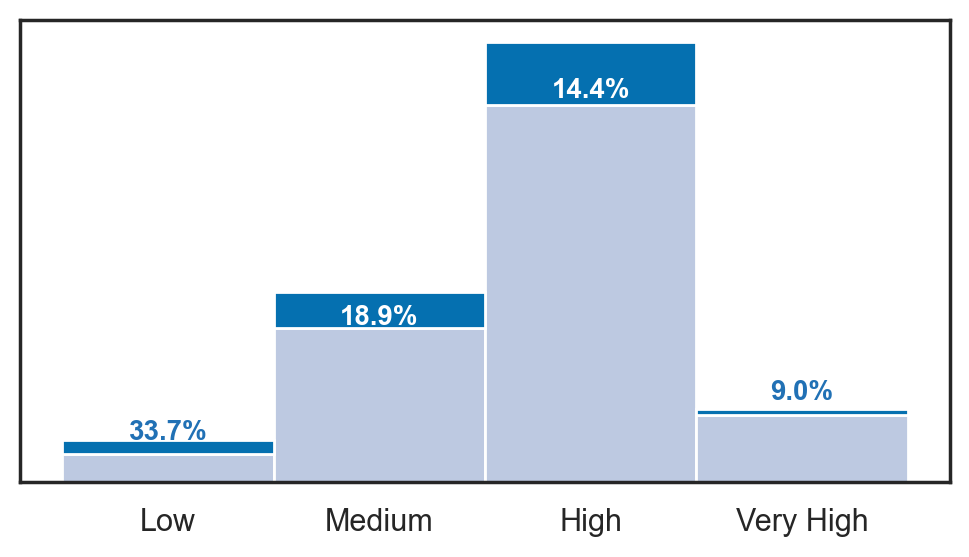

In [305]:
attrition_job_involvement_data = attrition_data.groupby(['JobInvolvement', 'Attrition']).size().reset_index(name='Counts')
attrition_job_involvement_data['Percentages'] = (attrition_job_involvement_data['Counts'] / attrition_job_involvement_data.groupby('JobInvolvement')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="JobInvolvement", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binrange=(0.5, 4.5), binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=[])

env_sat_values = attrition_data['JobInvolvement'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_job_involvement_data[(attrition_job_involvement_data['JobInvolvement']==v) & (attrition_job_involvement_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        if v == 1 or v == 4:
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='#2171b5', fontweight='bold', xytext=(0, 5), textcoords='offset points')
        else:
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')

plt.xticks(ticks=[1, 2, 3, 4], labels=['Low', 'Medium', 'High', 'Very High'])
plt.show()

# Job Satisfaction

In [290]:
attrition_job_satisfaction_data = attrition_data["Attrition"].groupby(attrition_data["JobSatisfaction"]).value_counts(normalize=True)*100
attrition_job_satisfaction_data

JobSatisfaction  Attrition
1                No           77.162630
                 Yes          22.837370
2                No           83.571429
                 Yes          16.428571
3                No           83.484163
                 Yes          16.515837
4                No           88.671024
                 Yes          11.328976
Name: Attrition, dtype: float64

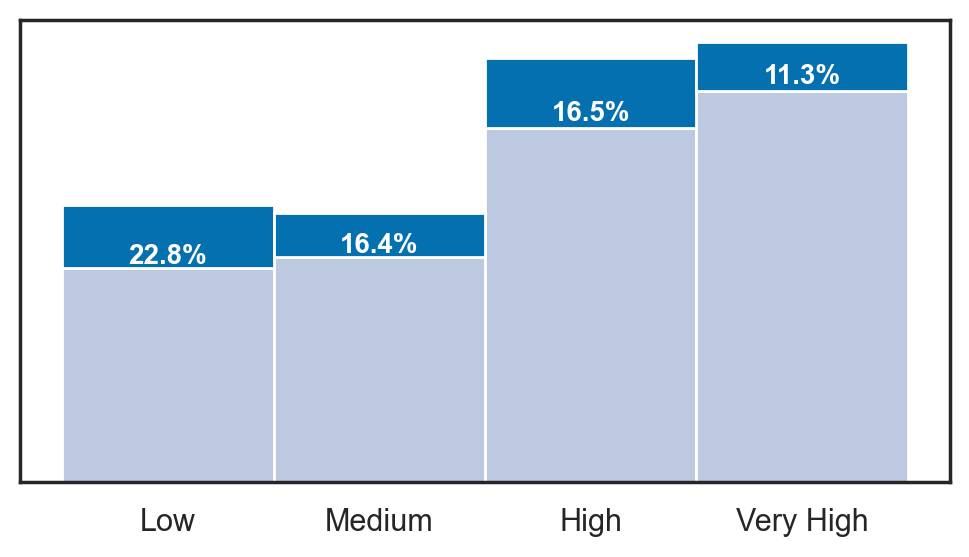

In [311]:
attrition_job_satisfaction_data = attrition_data.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Counts')
attrition_job_satisfaction_data['Percentages'] = (attrition_job_satisfaction_data['Counts'] / attrition_job_satisfaction_data.groupby('JobSatisfaction')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="JobSatisfaction", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binrange=(0.5, 4.5), binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=[])

env_sat_values = attrition_data['JobSatisfaction'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_job_satisfaction_data[(attrition_job_satisfaction_data['JobSatisfaction']==v) & (attrition_job_satisfaction_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')

plt.xticks(ticks=[1, 2, 3, 4], labels=['Low', 'Medium', 'High', 'Very High'])
plt.show()

# Travel

In [306]:
attrition_travel_data = attrition_data["Attrition"].groupby(attrition_data["BusinessTravel"]).value_counts(normalize=True)*100
attrition_travel_data

BusinessTravel     Attrition
Non-Travel         No           92.000000
                   Yes           8.000000
Travel_Frequently  No           75.090253
                   Yes          24.909747
Travel_Rarely      No           85.043145
                   Yes          14.956855
Name: Attrition, dtype: float64

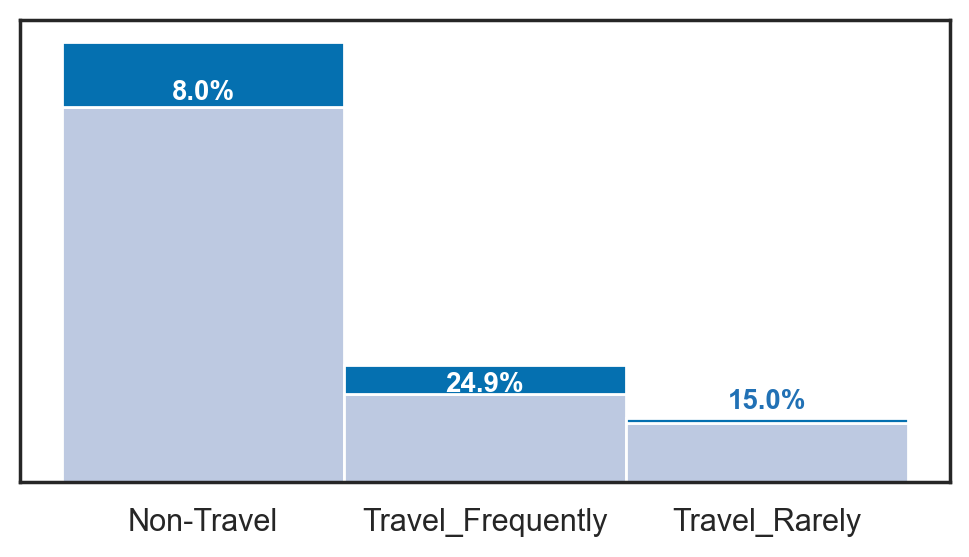

In [328]:
attrition_travel_data = attrition_data.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Counts')
attrition_travel_data['Percentages'] = (attrition_travel_data['Counts'] / attrition_travel_data.groupby('BusinessTravel')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="BusinessTravel", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], yticklabels=[])

env_sat_values = attrition_data['BusinessTravel'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_travel_data[(attrition_travel_data['BusinessTravel']==v) & (attrition_travel_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        if v == "Travel_Rarely":
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='#2171b5', fontweight='bold', xytext=(0, 5), textcoords='offset points')
        else:
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')


plt.show()

# Overtime

In [240]:
attrition_overtime_data = attrition_data["Attrition"].groupby(attrition_data["OverTime"]).value_counts(normalize=True)*100
attrition_overtime_data

OverTime  Attrition
No        No           89.563567
          Yes          10.436433
Yes       No           69.471154
          Yes          30.528846
Name: Attrition, dtype: float64

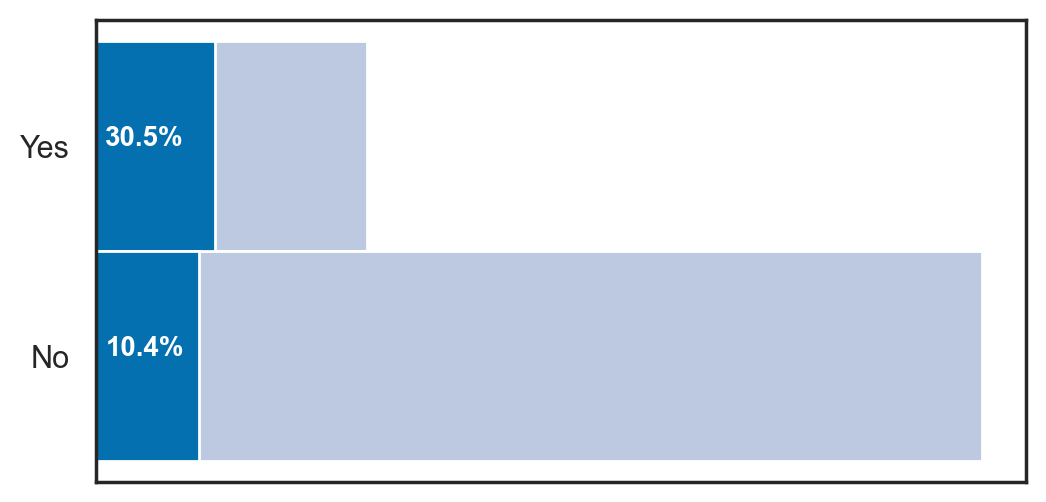

In [245]:
attrition_overtime_data = attrition_data.groupby(['OverTime', 'Attrition']).size().reset_index(name='Counts')
attrition_overtime_data['Percentages'] = (attrition_overtime_data['Counts'] / attrition_overtime_data.groupby('OverTime')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, y="OverTime", hue="Attrition", palette=attrition_palette, alpha=1, legend=False).set(xlabel=None, ylabel=None, xticklabels=[])

for i, v in enumerate(attrition_data['OverTime'].unique()):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_overtime_data[(attrition_overtime_data['OverTime']==v) & (attrition_overtime_data['Attrition']==attrition_value)]['Percentages'].values[0])
        ax.annotate(percentage, xy=(0.01, i+j/2), xycoords=ax.get_yaxis_transform(), fontsize=10, color='white', fontweight='bold')
        
plt.show()

# Total Working Years

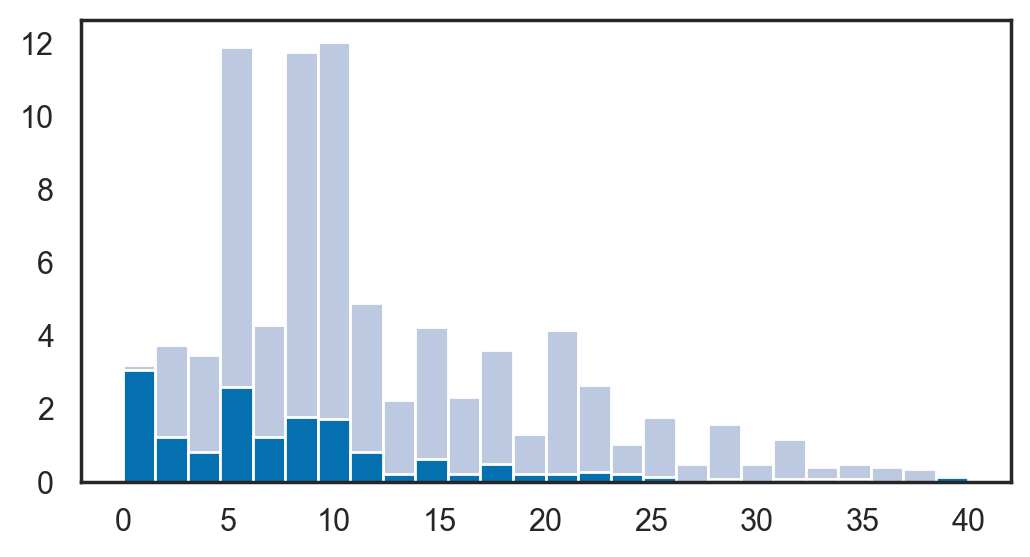

In [230]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, x="TotalWorkingYears", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None)
plt.show()

# Years at Company

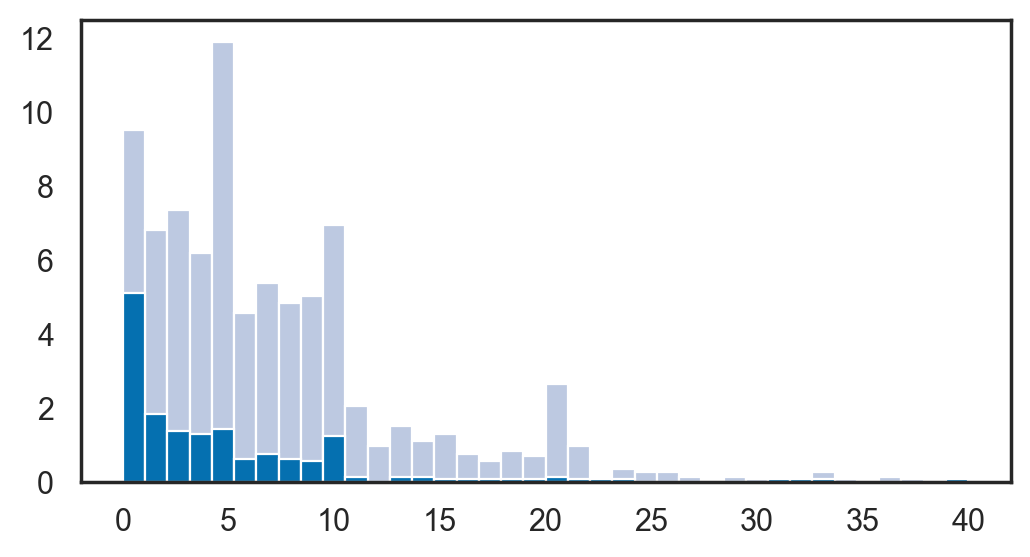

In [233]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, x="YearsAtCompany", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None)
plt.show()

# Years In Current Role

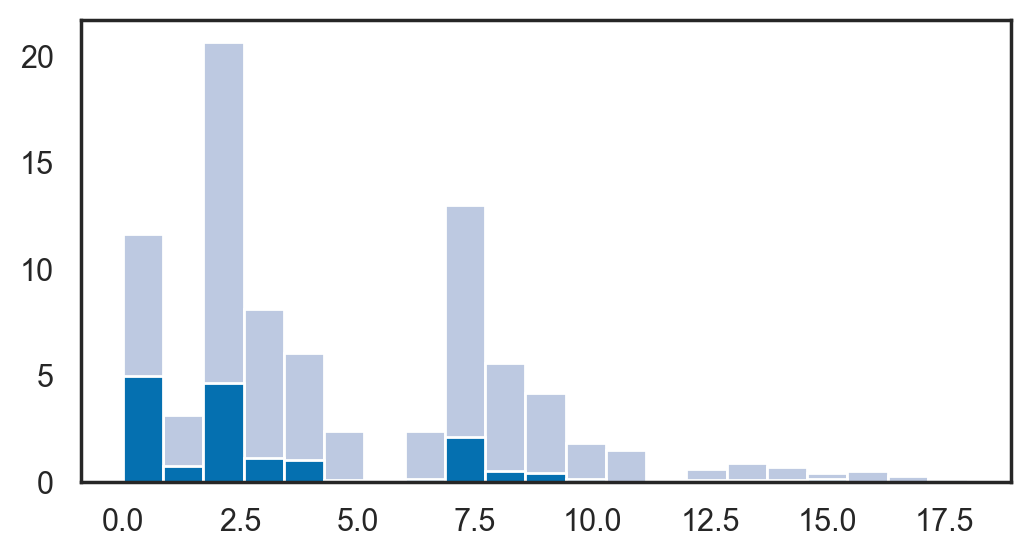

In [234]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, x="YearsInCurrentRole", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None)
plt.show()

# Clustering

In [39]:
def run_kmodes(n_clusters=None, filtered_data_cluster=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(attrition_data)

  # Print intertia
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [40]:
cost_values = []

In [41]:
for k in range(1, 21):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    filtered_data_cluster=attrition_data
  )

  # Save cost to our container
  cost_values.append(cost)

Cost for n_clusters = 1: 28527.0
Cost for n_clusters = 2: 27134.0
Cost for n_clusters = 3: 26366.0
Cost for n_clusters = 4: 25907.0
Cost for n_clusters = 5: 25629.0
Cost for n_clusters = 6: 25363.0
Cost for n_clusters = 7: 25224.0
Cost for n_clusters = 8: 25083.0
Cost for n_clusters = 9: 24865.0
Cost for n_clusters = 10: 24801.0
Cost for n_clusters = 11: 24610.0
Cost for n_clusters = 12: 24513.0
Cost for n_clusters = 13: 24392.0
Cost for n_clusters = 14: 24273.0
Cost for n_clusters = 15: 24228.0
Cost for n_clusters = 16: 24119.0
Cost for n_clusters = 17: 24043.0
Cost for n_clusters = 18: 23855.0
Cost for n_clusters = 19: 23829.0
Cost for n_clusters = 20: 23719.0


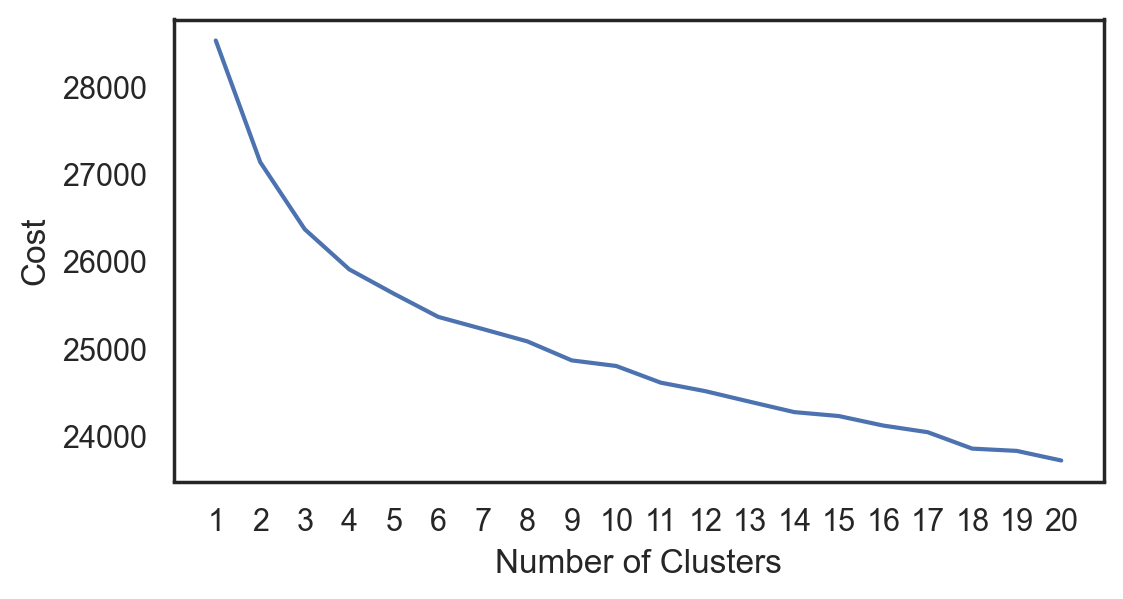

In [42]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 21), cost_values)

# Format plot
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [43]:
# Run our K-Modes function for n_clusters
cost, labels = run_kmodes(
  n_clusters=9,
  filtered_data_cluster=attrition_data
)

Cost for n_clusters = 9: 24865.0


In [44]:
attrition_data['labels']= labels
attrition_data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                     8                     0                1              6   
1                    10                     3                3             10   
2                     7                     3                3              0   
3                     8                     3                3              8   
4                     6                     3                3              2   
...                 ...                   ...              ...            ...   
1465                 17                     3                3              5   
1466                  9                     5                3              7   
1467                  6                     0                3              6   
1468                 17                     3                2              9   
1469                  6                     3                4              4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager labels  
0                      4                        0                     5      7  
1                      7                        1                     7      1  
2                      0                        0                     0      2  
3                      7                        3                 

In [45]:
attrition_data['labels'].value_counts().sort_index()

0    233
1    194
2    288
3    151
4    190
5    136
6     56
7    116
8    106
Name: labels, dtype: int64

In [46]:
attrition_data.groupby('labels').agg(pd.Series.mode)

Age Attrition BusinessTravel  \
labels                                 
0        35        No  Travel_Rarely   
1        34        No  Travel_Rarely   
2        30        No  Travel_Rarely   
3        40        No  Travel_Rarely   
4        27        No  Travel_Rarely   
5        29        No  Travel_Rarely   
6        35       Yes  Travel_Rarely   
7        35        No  Travel_Rarely   
8        31        No  Travel_Rarely   

                                                DailyRate  \
labels                                                      
0                                                     217   
1                                                     688   
2                                             [202, 1082]   
3                                  [419, 541, 1111, 1329]   
4                                              [201, 691]   
5                      [364, 894, 1005, 1017, 1431, 1469]   
6       [103, 172, 185, 192, 224, 267, 289, 307, 318, ...   
7                                              [430, 817]   
8                    [153, 334, 429, 501, 583, 783, 1199]   

                    Department  DistanceFromHome  Education EducationField  \
labels                                                                       
0                        Sales                 2          3  Life Sciences   
1       Research & Development                 1          3  Life Sciences   
2       Research & Development                 2          3  Life Sciences   
3                        Sales                 2          4  Life Sciences   
4       Research & Development                 2          3  Life Sciences   
5       Research & Development                 1          3        Medical   
6       Research & Development                 9          4  Life Sciences   
7                        Sales                 1          3        Medical   
8       Research & Development                 1          2        Medical   

        EnvironmentSatisfaction  Gender  ... PercentSalaryHike  \
labels                                   ...                     
0                             4    Male  ...                13   
1                             4    Male  ...                13   
2                             3    Male  ...                11   
3                             4    Male  ...                11   
4                             3    Male  ...                13   
5                             4  Female  ...                14   
6                             3    Male  ...                11   
7                             2  Female  ...                14   
8                             3    Male  ...                12   

        PerformanceRating  RelationshipSatisfaction TotalWorkingYears  \
labels                                                                  
0                       3                         4                10   
1                       3                         1                10   
2                       3                         3                 1   
3                       3                         3                 8   
4                       3                         4                 6   
5                       3                         3                 5   
6                       3                         2                10   
7                       3                         4                10   
8                       3                         4                10   

        TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
labels                                                          
0                           2               3              10   
1                           3               3               7   
2                           3               3               1   
3                           2               3               3   
4                           3               3               5   
5                           2               3     

In [47]:
clustered_data_1 = attrition_data.groupby('labels').agg(pd.Series.mode)

# Save Clustered Data
# clustered_data_1.to_csv('clustered_data_1', index=False)

In [48]:
pd.set_option('display.max_columns', None)
clustered_data_1.head(9)

Age Attrition BusinessTravel  \
labels                                 
0        35        No  Travel_Rarely   
1        34        No  Travel_Rarely   
2        30        No  Travel_Rarely   
3        40        No  Travel_Rarely   
4        27        No  Travel_Rarely   
5        29        No  Travel_Rarely   
6        35       Yes  Travel_Rarely   
7        35        No  Travel_Rarely   
8        31        No  Travel_Rarely   

                                                DailyRate  \
labels                                                      
0                                                     217   
1                                                     688   
2                                             [202, 1082]   
3                                  [419, 541, 1111, 1329]   
4                                              [201, 691]   
5                      [364, 894, 1005, 1017, 1431, 1469]   
6       [103, 172, 185, 192, 224, 267, 289, 307, 318, ...   
7                                              [430, 817]   
8                    [153, 334, 429, 501, 583, 783, 1199]   

                    Department  DistanceFromHome  Education EducationField  \
labels                                                                       
0                        Sales                 2          3  Life Sciences   
1       Research & Development                 1          3  Life Sciences   
2       Research & Development                 2          3  Life Sciences   
3                        Sales                 2          4  Life Sciences   
4       Research & Development                 2          3  Life Sciences   
5       Research & Development                 1          3        Medical   
6       Research & Development                 9          4  Life Sciences   
7                        Sales                 1          3        Medical   
8       Research & Development                 1          2        Medical   

        EnvironmentSatisfaction  Gender                HourlyRate  \
labels                                                              
0                             4    Male                        46   
1                             4    Male                        32   
2                             3    Male                        79   
3                             4    Male  [42, 48, 61, 67, 88, 98]   
4                             3    Male                        84   
5                             4  Female                        86   
6                             3    Male                       100   
7                             2  Female                        54   
8                             3    Male                        80   

        JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
labels                                                                         
0                    3         2            Sales Executive                3   
1                    3         2         Research Scientist                4   
2                    3         1      Laboratory Technician                3   
3                    3         2            Sales Executive                4   
4                    3         1         Research Scientist                3   
5                    2         1         Research Scientist                3   
6                    2         1      Laboratory Technician                1   
7                    3         2            Sales Executive                4   
8                    3         2  Healthcare Representative                1   

       MaritalStatus  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
labels                                                                        
0             Single                   1      Y       No                 13   
1           Divorced                   1      Y       No                 13   
2            Married                   1      Y       No                 11   
